In [23]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [20]:
# Create a non-stationary time series
df = pd.read_csv("Electric_Production.csv")
df.columns=['Date','data']
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
result = adfuller(df['data'])
p_value = result[1]
if p_value > 0.05:
    print(f'Time series is non-stationary (p-value = {p_value:.4f}).')

Time series is non-stationary (p-value = 0.1862).


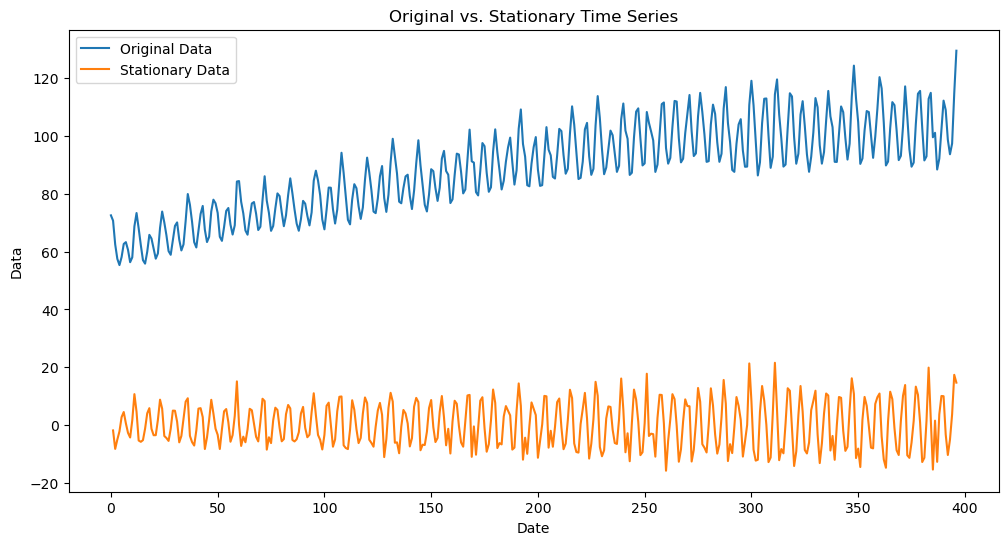

In [22]:
# Perform differencing to make it stationary
df['stationary_data'] = df['data'].diff().dropna()

# Plot of original and stationary time series
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['data'], label='Original Data')
plt.plot(df.index, df['stationary_data'], label='Stationary Data')
plt.xlabel('Date')
plt.ylabel('Data')
plt.legend()
plt.title('Original vs. Stationary Time Series')
plt.show()

# Save the stationary time series to a new CSV file
df.to_csv('stationary_data.csv')


In [25]:
df.sample(5)

,Date,data,stationary_data
55,1989-08-01,75.0448,1.0147
379,2016-08-01,115.5159,0.9762
145,1997-02-01,89.7795,-8.6818
74,1991-03-01,73.3650,-4.1923
124,1995-05-01,73.2682,-0.5485
